# RUN THIS Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

RUN THIS Read in all tables and visualize.

In [3]:
aisles = pd.read_csv('aisles.csv')

departments = pd.read_csv('departments.csv')

order_products_prior = pd.read_csv('order_products__prior.csv')

order_products_train = pd.read_csv('order_products__train.csv')

orders = pd.read_csv('orders.csv')

products = pd.read_csv('products.csv')

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


# BEGIN CHECK ORDERS AND ORDER_PRODUCTS - EUGENE

In [100]:
order_products_prior['order_id'].nunique()

3214874

In [101]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [102]:
order_products_train['order_id'].nunique()

131209

In [103]:
order_products_prior['order_id'].equals(order_products_train['order_id'])

False

In [104]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [105]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [106]:
orders.groupby(['user_id'])['order_id'].count()

user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Name: order_id, Length: 206209, dtype: int64

In [107]:
orders.groupby(['eval_set'])['user_id'].count()

eval_set
prior    3214874
test       75000
train     131209
Name: user_id, dtype: int64

In [108]:
orders.groupby(['eval_set'])['user_id'].nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [109]:
orders.groupby(['eval_set'])['order_id'].count()

eval_set
prior    3214874
test       75000
train     131209
Name: order_id, dtype: int64

In [110]:
###CHECKING "TRAIN" EVAL SET COMPOSITION

orders_check = orders[orders['eval_set'] == 'train']
orders_check.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [111]:
orders[orders['user_id'] == 1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [112]:
orders[orders['user_id'] == 8]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
75,600894,8,prior,1,6,0,NaN
76,2979257,8,prior,2,1,8,30.0
77,2570360,8,prior,3,5,0,30.0
78,880375,8,train,4,1,14,10.0


In [113]:
###CHECKING "TEST" EVAL SET USER COMPOSITION

orders_check2 = orders[orders['eval_set'] == 'test']
orders_check2.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [114]:
orders[orders['user_id'] == 3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


In [115]:
orders[orders['user_id'] == 4]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
39,3343014,4,prior,1,6,11,NaN
40,2030307,4,prior,2,4,11,19.0
41,691089,4,prior,3,4,15,21.0
42,94891,4,prior,4,5,13,15.0
43,2557754,4,prior,5,5,13,0.0
44,329954,4,test,6,3,12,30.0


# END CHECK ORDERS AND ORDERS_PRODUCTS - EUGENE

In [116]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


RUN THIS Convert the order_hour_of day to datetime hour (ex. 8:00 AM) and Day of Week from 0 to "Saturday".

In [117]:
hours = list(range(24))
hod = {hours:datetime.time(hours).strftime("%I:00 %p") for hours in hours}
orders['order_hour_of_day'] = orders['order_hour_of_day'].replace(to_replace=hod, value=None)
orders['order_hour_of_day'] = pd.Categorical(orders['order_hour_of_day'],ordered=True,categories=list(hod.values()))
days = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
orders['order_dow'] = orders['order_dow'].replace(to_replace=days, value=None)
orders['order_dow'] = pd.Categorical(orders['order_dow'],ordered=True,categories=list(days.values()))

In [118]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,Monday,08:00 AM,NaN
1,2398795,1,prior,2,Tuesday,07:00 AM,15.0
2,473747,1,prior,3,Tuesday,12:00 PM,21.0
3,2254736,1,prior,4,Wednesday,07:00 AM,29.0
4,431534,1,prior,5,Wednesday,03:00 PM,28.0


Merging of order_products_train and order_products_prior.

RUN THIS Merge order_products, products, orders, departments, aisles.

In [7]:
order_products = pd.concat([order_products_train, order_products_prior])
order_products = order_products.merge(products, on='product_id', how='left').merge(orders, on='order_id', how='left').merge(departments, on='department_id').merge(aisles, on='aisle_id')
order_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,dairy eggs,yogurt
1,98,43654,3,1,Whole Milk Greek Blended Vanilla Bean Yogurt,120,16,56463,train,41,3,8,14.0,dairy eggs,yogurt
2,170,8153,6,0,Plain Non-Fat Greek Yogurt,120,16,182389,train,7,0,13,14.0,dairy eggs,yogurt
3,631,9203,13,1,Dairy Free Coconut Milk Raspberry Yogurt Alter...,120,16,184099,train,7,3,9,30.0,dairy eggs,yogurt
4,631,15842,14,1,Dairy Free Coconut Milk Yogurt Alternative,120,16,184099,train,7,3,9,30.0,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,3420344,4268,4,1,Spot's Stew Chicken Cat Food,41,8,14846,prior,37,1,10,6.0,pets,cat food care
33819102,3420746,41370,7,1,Core Turkey & Chicken Liver Canned Cat Food,41,8,133548,prior,9,1,14,7.0,pets,cat food care
33819103,3420746,10863,9,1,Grain Free Turkey & Salmon Formula Cat Food,41,8,133548,prior,9,1,14,7.0,pets,cat food care
33819104,3421072,28134,6,0,Grain Free Turkey Canned Cat Food,41,8,50050,prior,3,3,19,26.0,pets,cat food care


In [127]:
order_products['eval_set'].value_counts(dropna=False)

prior    32434489
train     1384617
Name: eval_set, dtype: int64

RUN THIS For order_products_train, merge order_products, products, orders, departments, aisles.

In [11]:
order_products_train_merged = order_products_train.merge(products, on='product_id', how='left').merge(orders, on='order_id', how='left').merge(departments, on='department_id').merge(aisles, on='aisle_id')
order_products_train_merged

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,dairy eggs,yogurt
1,98,43654,3,1,Whole Milk Greek Blended Vanilla Bean Yogurt,120,16,56463,train,41,3,8,14.0,dairy eggs,yogurt
2,170,8153,6,0,Plain Non-Fat Greek Yogurt,120,16,182389,train,7,0,13,14.0,dairy eggs,yogurt
3,631,9203,13,1,Dairy Free Coconut Milk Raspberry Yogurt Alter...,120,16,184099,train,7,3,9,30.0,dairy eggs,yogurt
4,631,15842,14,1,Dairy Free Coconut Milk Yogurt Alternative,120,16,184099,train,7,3,9,30.0,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3413737,3618,2,0,Grilled Seafood Feast Variety Cat Food,41,8,195012,train,55,6,22,0.0,pets,cat food care
1384613,3413737,2727,3,1,Poultry & Beef Feast Variety Cat Food,41,8,195012,train,55,6,22,0.0,pets,cat food care
1384614,3416173,45855,4,0,Prime Filets Seafood Favorites Variety Pack Ca...,41,8,62014,train,5,6,14,15.0,pets,cat food care
1384615,3418238,29010,22,0,Original Cat Litter,41,8,46578,train,6,3,12,15.0,pets,cat food care


# BEGIN ORDER_PRODUCTS_TRAIN DATACLEAN CHECK - EUGENE

In [12]:
order_products_train_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,dairy eggs,yogurt
1,98,43654,3,1,Whole Milk Greek Blended Vanilla Bean Yogurt,120,16,56463,train,41,3,8,14.0,dairy eggs,yogurt
2,170,8153,6,0,Plain Non-Fat Greek Yogurt,120,16,182389,train,7,0,13,14.0,dairy eggs,yogurt
3,631,9203,13,1,Dairy Free Coconut Milk Raspberry Yogurt Alter...,120,16,184099,train,7,3,9,30.0,dairy eggs,yogurt
4,631,15842,14,1,Dairy Free Coconut Milk Yogurt Alternative,120,16,184099,train,7,3,9,30.0,dairy eggs,yogurt


In [13]:
###QUICK RANGE CHECK ON NUMERICAL FIELDS FOR ISSUES

order_products_train_merged.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01,7.130423e+01,9.839777e+00,1.031128e+05,1.709141e+01,2.701392e+00,1.357759e+01,1.706613e+01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01,3.810409e+01,6.292830e+00,5.948715e+04,1.661404e+01,2.167646e+00,4.238458e+00,1.042642e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.173200e+04,6.000000e+00,1.000000e+00,1.000000e+01,7.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00,8.300000e+01,8.000000e+00,1.029330e+05,1.100000e+01,3.000000e+00,1.400000e+01,1.500000e+01
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.549590e+05,2.100000e+01,5.000000e+00,1.700000e+01,3.000000e+01
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [14]:
###CHECK FOR NULL VALUES

order_products_train_merged.isnull().values.any()

False

In [15]:
###CHECK FOR NUMBER OF DIFFERENT AISLES AND DEPARTMENT VALUES

print(order_products_train_merged['product_id'].nunique())
print(order_products_train_merged['aisle'].nunique())
print(order_products_train_merged['department'].nunique())

39123
134
21


RUN THIS

In [16]:
###DROP EVAL_SET COLUMNS

order_products_train_merged = order_products_train_merged.drop(['eval_set'], axis=1)
order_products_train_merged.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'user_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'department', 'aisle'],
      dtype='object')

# END ORDER_PRODUCTS_TRAIN DATACLEAN - EUGENE

# EXPLORATORY DATA ANALYSIS - MARION

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Order Count Per Hour Of The Day')]

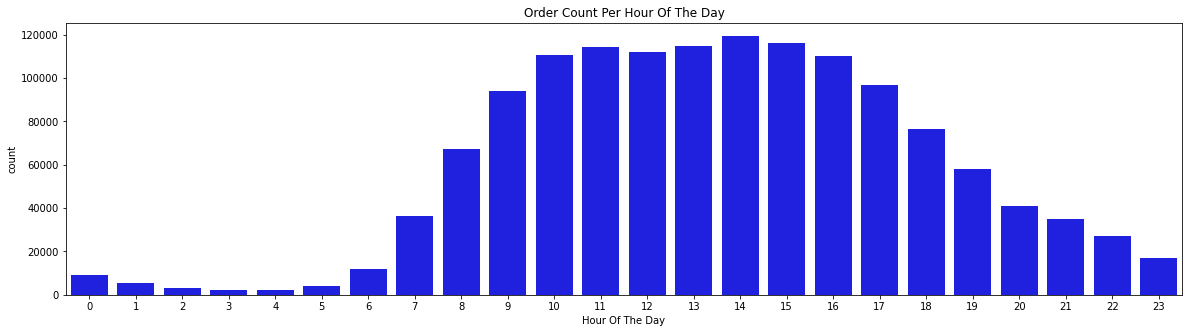

In [17]:
chart,axis = plt.subplots()
chart.set_size_inches(20,5)
sns.countplot(data= order_products_train_merged,x="order_hour_of_day",ax=axis,color="#0000FF")
axis.set(xlabel='Hour Of The Day',title="Order Count Per Hour Of The Day")

[Text(0.5, 0, 'Day Of The Week'),
 Text(0.5, 1.0, 'Order Count Across Days Of The Week')]

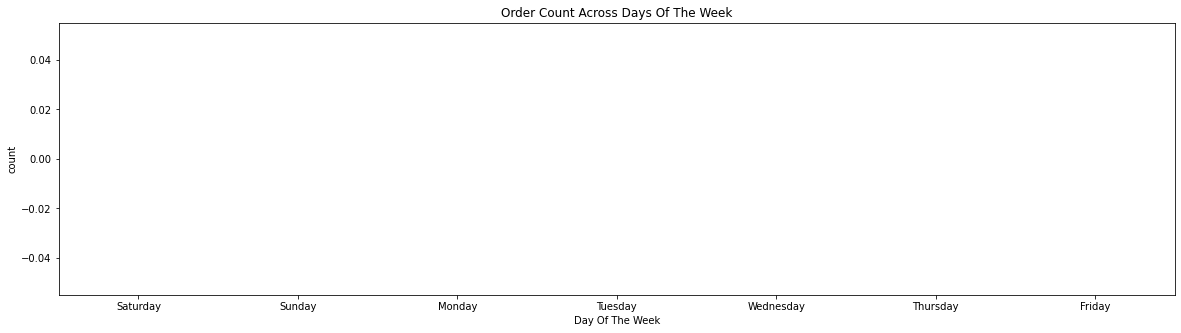

In [18]:
chart,axis = plt.subplots()
chart.set_size_inches(20,5)
ordersDay = order_products_train_merged[["order_dow"]].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

sns.countplot(color="#0000FF",data=order_products_train_merged,x="order_dow",ax=axis,order=["Saturday","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday"])
axis.set(xlabel='Day Of The Week',title="Order Count Across Days Of The Week")

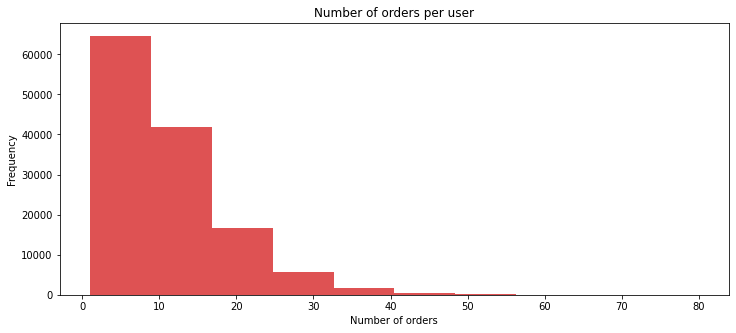

In [19]:
# number of orders per user
color = sns.color_palette()
#
plt.figure(figsize=(12,5))
order_products_train_merged.user_id.value_counts().plot.hist(alpha=0.8, color=color[3])
plt.title("Number of orders per user")
plt.xlabel("Number of orders")
plt.ylabel("Frequency")
plt.show()

In [20]:
hours_day = order_products_train_merged.groupby(['order_dow','order_hour_of_day'])['order_number'].agg('count').reset_index()
# hours_day['order_dow']

In [21]:
# hours_day['order_dow']
hours_day = hours_day.pivot('order_dow','order_hour_of_day','order_number')
hours_day.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='order_hour_of_day')

<AxesSubplot:xlabel='order_hour_of_day', ylabel='order_dow'>

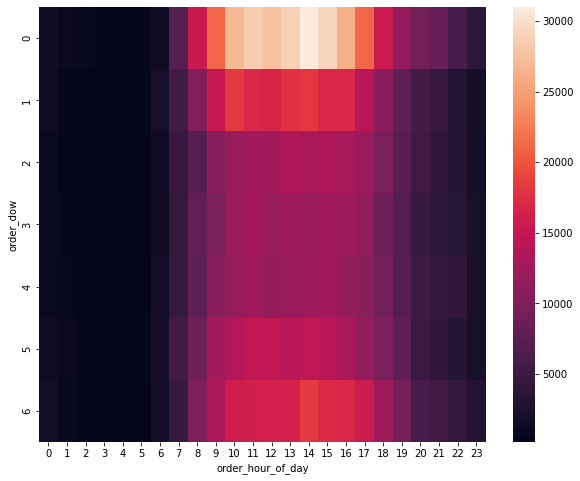

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(hours_day)

In [23]:
dept_product = order_products_train_merged[['department','aisle','product_name','order_dow','order_hour_of_day']]
# plt.figure(figsize=(10,8))
# sns.heatmap(dept_product)
dept_product

,department,aisle,product_name,order_dow,order_hour_of_day
0,dairy eggs,yogurt,Bulgarian Yogurt,4,10
1,dairy eggs,yogurt,Whole Milk Greek Blended Vanilla Bean Yogurt,3,8
2,dairy eggs,yogurt,Plain Non-Fat Greek Yogurt,0,13
3,dairy eggs,yogurt,Dairy Free Coconut Milk Raspberry Yogurt Alter...,3,9
4,dairy eggs,yogurt,Dairy Free Coconut Milk Yogurt Alternative,3,9
...,...,...,...,...,...
1384612,pets,cat food care,Grilled Seafood Feast Variety Cat Food,6,22
1384613,pets,cat food care,Poultry & Beef Feast Variety Cat Food,6,22
1384614,pets,cat food care,Prime Filets Seafood Favorites Variety Pack Ca...,6,14
1384615,pets,cat food care,Original Cat Litter,3,12


Check to see if products can belong to multiple aisles:

In [24]:
# order_products_train_merged
check_aisle = dept_product[['aisle','department']].drop_duplicates().groupby('aisle')['department'].value_counts()
# (check_aisle ==1).all()
check_aisle

aisle                          department   
air fresheners candles         household        1
asian foods                    international    1
baby accessories               babies           1
baby bath body care            babies           1
baby food formula              babies           1
                                               ..
trash bags liners              household        1
vitamins supplements           personal care    1
water seltzer sparkling water  beverages        1
white wines                    alcohol          1
yogurt                         dairy eggs       1
Name: department, Length: 134, dtype: int64

Number of aisles per department:

/Users/marioncassim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Aisle')

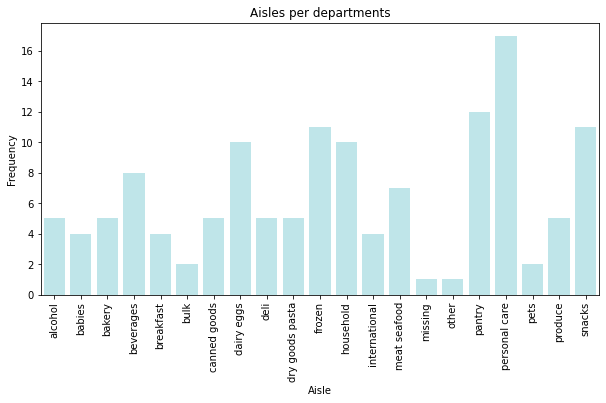

In [25]:
aisle_per_dept = pd.DataFrame(check_aisle)
aisle_per_dept = aisle_per_dept.rename(columns={'department':'count of departments'})
aisle_per_dept = aisle_per_dept.groupby('department').size()
# type(aisle_per_dept)

plt.figure(figsize=(10,5))
sns.barplot(aisle_per_dept.index, aisle_per_dept.values, color=color[9], alpha = 0.3)
plt.xticks(rotation = 'vertical')
plt.title("Aisles per departments")
plt.ylabel("Frequency")
plt.xlabel("Aisle")

/Users/marioncassim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Aisle')

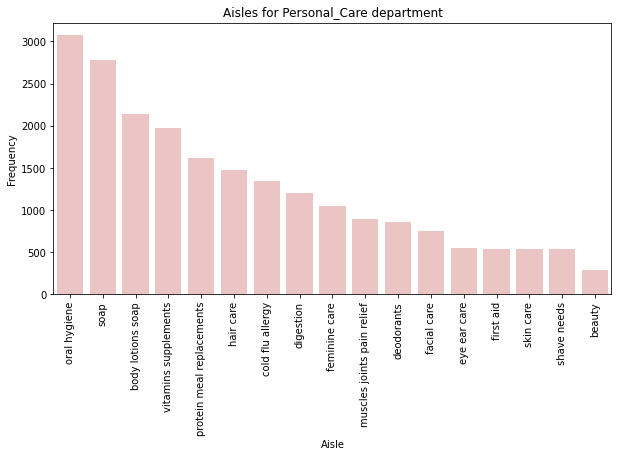

In [26]:
pcare = dept_product[dept_product['department'] == "personal care"]['aisle'].value_counts()

personal_care = pd.DataFrame(pcare)
# personal_care = personal_care.reset_index()
personal_care = personal_care.rename(columns={'aisle' :'count', 'index':'aisle'})
# personal_care = personal_care.reset_index('aisle')
personal_care = personal_care['count']
plt.figure(figsize=(10,5))
sns.barplot(personal_care.index, personal_care.values, color=color[3], alpha = 0.3)
plt.xticks(rotation = 'vertical')
plt.title("Aisles for Personal_Care department")
plt.ylabel("Frequency")
plt.xlabel("Aisle")

/Users/marioncassim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Aisle')

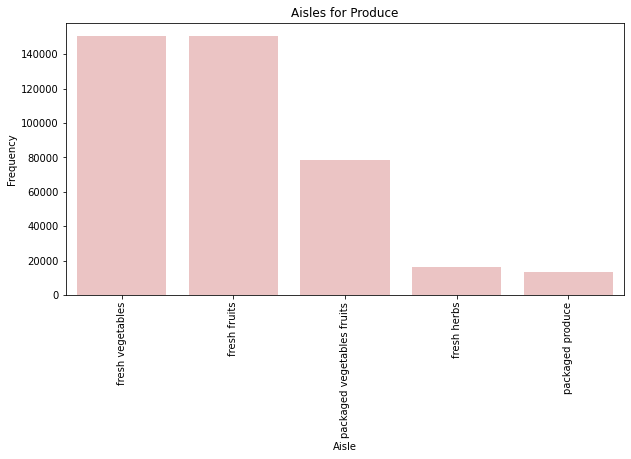

In [27]:
pcare = dept_product[dept_product['department'] == "produce"]['aisle'].value_counts()

personal_care = pd.DataFrame(pcare)
# personal_care = personal_care.reset_index()
personal_care = personal_care.rename(columns={'aisle' :'count', 'index':'aisle'})
# personal_care = personal_care.reset_index('aisle')
personal_care = personal_care['count']
plt.figure(figsize=(10,5))
sns.barplot(personal_care.index, personal_care.values, color=color[3], alpha = 0.3)
plt.xticks(rotation = 'vertical')
plt.title("Aisles for Produce")
plt.ylabel("Frequency")
plt.xlabel("Aisle")

Total Aisles 

In [28]:
aisle_per_dept.sum()

134

Aises per Departments

In [29]:
aisle_per_dept.value_counts

<bound method IndexOpsMixin.value_counts of department
alcohol             5
babies              4
bakery              5
beverages           8
breakfast           4
bulk                2
canned goods        5
dairy eggs         10
deli                5
dry goods pasta     5
frozen             11
household          10
international       4
meat seafood        7
missing             1
other               1
pantry             12
personal care      17
pets                2
produce             5
snacks             11
dtype: int64>

Most popular product overall:

/Users/marioncassim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Product')

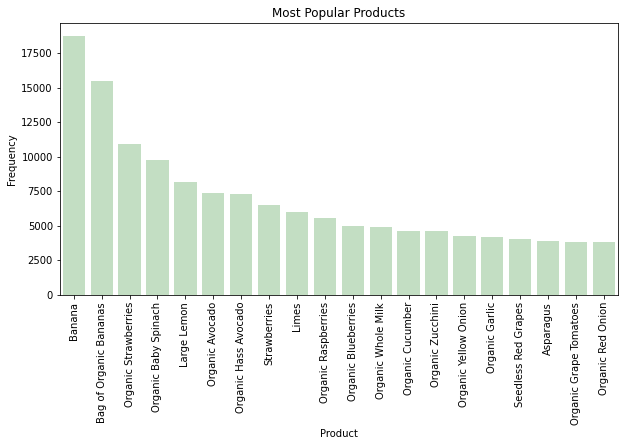

In [30]:
most_pop = dept_product['product_name'].value_counts()
most_pop = pd.DataFrame(most_pop)

most_pop =  most_pop['product_name']
top = 20
most_pop = most_pop[:top]

most_pop
plt.figure(figsize=(10,5))
sns.barplot(most_pop.index, most_pop.values, color=color[2], alpha = 0.3)
plt.xticks(rotation = 'vertical')
plt.title("Most Popular Products")
plt.ylabel("Frequency")
plt.xlabel("Product")


In [31]:
most_pop = dept_product['product_name'].value_counts()
most_pop = pd.DataFrame(most_pop)
most_pop =  most_pop['product_name']
top = 500
most_pop = most_pop[:500]
most_pop

Banana                            18726
Bag of Organic Bananas            15480
Organic Strawberries              10894
Organic Baby Spinach               9784
Large Lemon                        8135
                                  ...  
Organic Mixed Vegetables            398
Scoops! Tortilla Chips              398
Cheddar Bunnies Snack Crackers      397
Fresh CA Grown Eggs                 397
Original Rice Pilaf Mix             397
Name: product_name, Length: 500, dtype: int64

Most reordered prodcuts:


In [32]:
# order_products_train_merged[order_products_train_merged['product_name'] == '#2 Coffee Filters'].count()
reorder = order_products_train_merged.groupby('product_name')['reordered'].agg(['sum','count'])
# find how many times customers have ordered the same product / reorder sum
# reorder
reorder['reordered ratio'] = reorder['sum'].astype(float) / reorder['count'].astype(float)
# reorder = reorder.sort_values('reordered ratio',

# reorder
reorder = reorder.reset_index()
# reorder = reorder.sort_values('reordered ratio', ascending= False)
# reorder[reorder['product_name'] == 'Raw Veggie Wrappers']

# reorder[:500]

onlyreorders = reorder[reorder['reordered ratio'] != 0]

onlyreorders = onlyreorders.sort_values('count', ascending =False)
onlyreorders[:100]


,product_name,sum,count,reordered ratio
2814,Banana,16557,18726,0.884172
2641,Bag of Organic Bananas,13362,15480,0.863178
25128,Organic Strawberries,8603,10894,0.789701
22496,Organic Baby Spinach,8055,9784,0.823283
17475,Large Lemon,5923,8135,0.728089
...,...,...,...,...
30607,Russet Potato,804,1418,0.566996
14274,Granny Smith Apples,941,1379,0.682379
25045,Organic Spring Mix,895,1362,0.657122
22694,Organic Broccoli Florets,902,1361,0.662748


In [33]:
onlyreorders = onlyreorders.set_index('product_name')


In [34]:
onlyreorders_ratio = onlyreorders['reordered ratio']
highest_reorder_ratio = onlyreorders_ratio[:50]

/Users/marioncassim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Product')

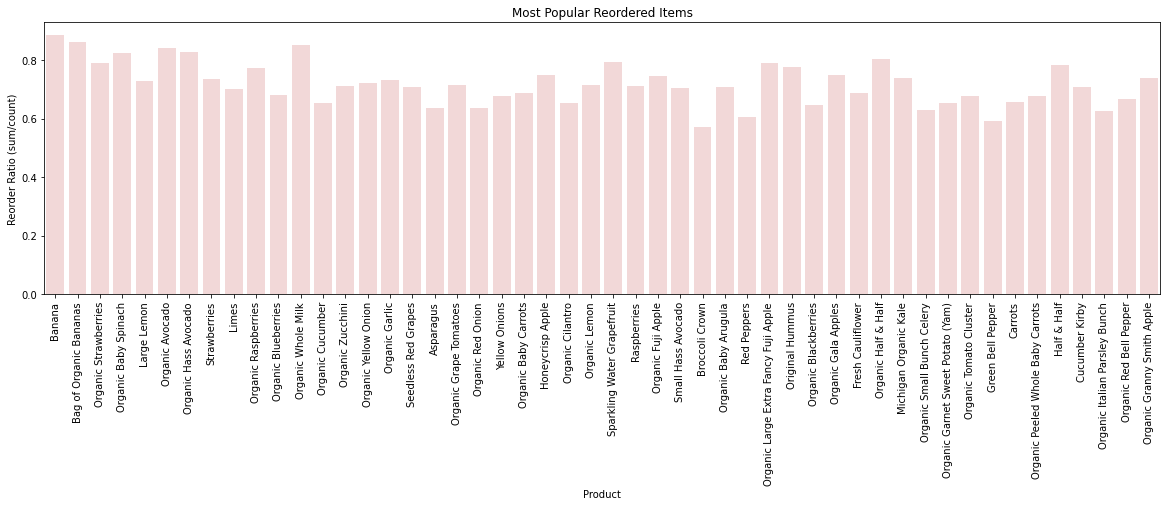

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(highest_reorder_ratio.index, highest_reorder_ratio.values, color=color[3], alpha = 0.2)
plt.xticks(rotation = 'vertical')
plt.title("Most Popular Reordered Items")
plt.ylabel("Reorder Ratio (sum/count)")
plt.xlabel("Product")

In [36]:
onlyreorders_ratio = onlyreorders['reordered ratio']


In [367]:
order_products_train_merged.head()
# clustering by customer segments & CNN (convolutional neural network): EUGENE 
# logistic: predict the probability of repurchase for X product grouped by department, depending on order time, order day  
# linear regression: predict the popularity of a given aisle based on time, day of week.(counts of product grouped by aisle)

#ERROR ANALYSIS; residual analysis, confusion matirx


# logistic: predict the probability of the customer buying a product they have already ordered ** NEEDS PRIOR SET

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,4,Wednesday,10:00 AM,9.0,dairy eggs,yogurt
1,98,43654,3,1,Whole Milk Greek Blended Vanilla Bean Yogurt,120,16,56463,41,Tuesday,08:00 AM,14.0,dairy eggs,yogurt
2,170,8153,6,0,Plain Non-Fat Greek Yogurt,120,16,182389,7,Saturday,01:00 PM,14.0,dairy eggs,yogurt
3,631,9203,13,1,Dairy Free Coconut Milk Raspberry Yogurt Alter...,120,16,184099,7,Tuesday,09:00 AM,30.0,dairy eggs,yogurt
4,631,15842,14,1,Dairy Free Coconut Milk Yogurt Alternative,120,16,184099,7,Tuesday,09:00 AM,30.0,dairy eggs,yogurt


In [45]:
highest_reorder_ratio = onlyreorders_ratio[:50]
highest_reorder_ratio_df = pd.DataFrame(highest_reorder_ratio)

In [57]:
highest_reorder_ratio_df

,reordered ratio
product_name,
Banana,0.884172
Bag of Organic Bananas,0.863178
Organic Strawberries,0.789701
Organic Baby Spinach,0.823283
Large Lemon,0.728089
Organic Avocado,0.840329
Organic Hass Avocado,0.828466
Strawberries,0.736988
Limes,0.701807


In [53]:
highest_reorder_ratio_df_merged = pd.merge(highest_reorder_ratio_df, order_products_train_merged, on='product_name',how = 'left')

In [56]:
highest_reorder_ratio_df_merged['product_name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                             Banana
1                             Banana
2                             Banana
3                             Banana
4                             Banana
                     ...            
225079    Organic Granny Smith Apple
225080    Organic Granny Smith Apple
225081    Organic Granny Smith Apple
225082    Organic Granny Smith Apple
225083    Organic Granny Smith Apple
Name: product_name, Length: 225084, dtype: object>

# END OF EDA

# TEST/SPLIT DATA IS HERE: RUN THIS CODE:

In [368]:
###70% Train 30% Test set creation

pred_train, pred_test = train_test_split(order_products_train_merged, test_size = 0.3, random_state=42, shuffle = True)

In [369]:
###Export to CSV

pred_train.to_csv("prediction_train_set.csv", index=False)
pred_test.to_csv("prediction_test.set.csv", index=False)

GROUPING the test set


In [40]:
train_set = pd.read_csv('prediction_train_set.csv')

In [5]:
test_set.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1673396,43352,3,1,Raspberries,32,4,30983,72,Saturday,03:00 PM,2.0,produce,packaged produce
1,348647,9534,8,0,Organic White Bread Done Right,112,3,186018,5,Sunday,05:00 PM,0.0,bakery,bread
2,2677608,28576,50,0,Vanilla Bean Chia Pod,120,16,131720,8,Monday,02:00 PM,28.0,dairy eggs,yogurt
3,2785801,6475,20,0,Limonata Sparkling Lemon Beverage,77,7,69460,4,Friday,05:00 PM,30.0,beverages,soft drinks
4,1107279,32177,11,0,Blood Oranges,24,4,115636,4,Wednesday,10:00 AM,22.0,produce,fresh fruits


In [22]:
test_set[test_set['aisle'] == "asian foods"].count()

order_id                  2038
product_id                2038
add_to_cart_order         2038
reordered                 2038
product_name              2038
aisle_id                  2038
department_id             2038
user_id                   2038
order_number              2038
order_dow                 2038
order_hour_of_day         2038
days_since_prior_order    2038
department                2038
aisle                     2038
dtype: int64

In [35]:
test_set.groupby(["aisle"])["user_id"].count().reset_index(name="aisle_count")

,aisle,aisle_count
0,air fresheners candles,309
1,asian foods,2038
2,baby accessories,101
3,baby bath body care,89
4,baby food formula,4013
...,...,...
129,trash bags liners,488
130,vitamins supplements,581
131,water seltzer sparkling water,10941
132,white wines,345


In [63]:
# test_set.groupby(['aisle']).count()
#predict order count from certain aisle at certain hour and day of week

train_set_clean = train_set.groupby(["aisle", "order_dow","order_hour_of_day"])["user_id"].count().reset_index(name="aisle_count")

In [43]:
train_set_clean.to_csv("train_set_clean.csv")
# order_products.to_csv('order_products_merged.csv')

In [64]:
train_set_clean.reset_index

,aisle,order_dow,order_hour_of_day,aisle_count
0,air fresheners candles,Friday,01:00 PM,12
1,air fresheners candles,Friday,02:00 PM,14
2,air fresheners candles,Friday,03:00 PM,6
3,air fresheners candles,Friday,04:00 PM,6
4,air fresheners candles,Friday,05:00 AM,2
...,...,...,...,...
19694,yogurt,Wednesday,10:00 PM,104
19695,yogurt,Wednesday,11:00 AM,281
19696,yogurt,Wednesday,11:00 PM,45
19697,yogurt,Wednesday,12:00 AM,28


# END ORDER_PRODUCTS_TRAIN SPLIT - EUGENE

For order_products_prior, merge order_products, products, orders, departments, aisles.

In [370]:
order_products_prior_merged = order_products_prior.merge(products, on='product_id', how='left').merge(orders, on='order_id', how='left').merge(departments, on='department_id').merge(aisles, on='aisle_id')
order_products_prior_merged

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,Thursday,09:00 AM,8.0,dairy eggs,eggs
1,22,23341,6,1,Large Grade AA Eggs,86,16,30822,prior,25,Sunday,08:00 AM,12.0,dairy eggs,eggs
2,25,6383,7,1,All Whites 100% Egg Whites,86,16,59897,prior,19,Friday,10:00 AM,25.0,dairy eggs,eggs
3,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,Saturday,04:00 PM,7.0,dairy eggs,eggs
4,55,11520,12,0,Large Alfresco Eggs,86,16,127522,prior,8,Wednesday,02:00 PM,5.0,dairy eggs,eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3420783,32816,10,1,Sunflower Seeds,6,2,154802,prior,3,Sunday,10:00 AM,10.0,other,other
32434485,3420795,16583,4,0,Regular Nail Polish Remover,6,2,92196,prior,5,Thursday,10:00 AM,21.0,other,other
32434486,3420977,39461,2,1,Coffee Mate French Vanilla Creamer Packets,6,2,109561,prior,14,Tuesday,11:00 AM,16.0,other,other
32434487,3420990,12412,9,1,Organic Coco Whip,6,2,156431,prior,8,Monday,03:00 PM,18.0,other,other


Download order_products , order_products_prior_merged, and order_products_train_merged as csvs (in the same directory as this file is found).

In [1]:
# order_products.to_csv('order_products_merged.csv')

In [ ]:
# order_products_prior_merged.to_csv('order_products_prior_merged.csv')

In [ ]:
# order_products_train_merged.to_csv('order_products_train_merged.csv')